# Notes

Different problems give different number of points: 2, 3 or 4.

Please, fill `STUDENT` variable with your name, so that we call collect the results automatically. Each problem contains specific validation details. We will do our best to review your assignments, but please keep in mind, that for this assignment automatic grade (between $0$ an $1$) is the primary source of ground truth.

In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams["figure.figsize"] = (6,6)

In [3]:
import numpy as np
import torch

In [4]:
STUDENT = "Amit Zulan, Ophir Turetz"
ASSIGNMENT = 3
TEST = False

In [5]:
if TEST:
    import solutions
    total_grade = 0
    MAX_POINTS = 11

# Basic PyTorch

### 1. ReLU activation (2 points).

ReLU is the most commonly used activation function in many deep learning application. It's defined as

$$
ReLU(x) = \max(0, x).
$$

Input and output are tensors.\
Output must be of the same shape as input, and **will be tested against three random combinations of input tensor dimensions ($100 \leq n < 1000 $)**, while values of the input are drawn from standard normal distribution. Number of dimensions of the input will also be selected randomly and is either 1, 2 or 3.

In [11]:
def relu(arr):
    # your code goes here
    return torch.maximum(arr, torch.tensor(0))

In [ ]:
PROBLEM_ID = 1

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, relu)

In [13]:
if not TEST:
  a = torch.tensor([1, 2, -1])
  b = torch.tensor([[0.1, -1.2], [-2.2, -3.1], [4.9, 5.2]])
  print(torch.maximum(a, torch.tensor(0)))
  print(torch.maximum(b, torch.tensor(0)))
  print(relu(a))
  print(relu(b))

tensor([1, 2, 0])
tensor([[0.1000, 0.0000],
        [0.0000, 0.0000],
        [4.9000, 5.2000]])
tensor([1, 2, 0])
tensor([[0.1000, 0.0000],
        [0.0000, 0.0000],
        [4.9000, 5.2000]])


### 2. Mean squared error (2 points).

In this problem you need to calculate MSE for a pair of tensors `y_true` and `y_pred`. MSE is defined as usual:

$$
L_{MSE} = \frac{1}{N} \sum_i \left(y_i - \hat y_i\right)^2
$$

Note, however, that `y_true` and `y_pred`may be of **different shape**. While `y_true` is always $(N,)$, `y_pred` may be $(N,1)$, $(1, N)$ or $(N,)$. Input values are drawn from standard normal distribution and **shape is selected randomly ($100 \leq n < 1000 $)**.

In [49]:
def mse(y_true, y_pred):
    # your code goes here
    return torch.mean(torch.square(y_true - y_pred.reshape(-1)))

In [50]:
PROBLEM_ID = 2

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, mse)

In [51]:
if not TEST:
  print(torch.mean(torch.tensor([[1., 2], [3, 4], [5, 6]])))

  N = 100
  yt = torch.ones(N)
  ypN = torch.ones(N)
  ypN1 = torch.ones(N,1)
  yp1N = torch.ones(1, N)
  print(yt.shape)
  print(ypN.shape)
  print(ypN1.shape)
  print(yp1N.shape)
  print(ypN.reshape(-1).shape)
  print(ypN1.reshape(-1).shape)
  print(yp1N.reshape(-1).shape)

  print()

  print(mse(yt, ypN))
  print(mse(yt, ypN1))
  print(mse(yt, yp1N))

tensor(3.5000)
torch.Size([100])
torch.Size([100])
torch.Size([100, 1])
torch.Size([1, 100])
torch.Size([100])
torch.Size([100])
torch.Size([100])

tensor(0.)
tensor(0.)
tensor(0.)


### 3. Character-level encoding (4 points).

In computations in general and in machine learning specifically letters cannot be used directly, as computers only know about numbers.\
Text data may be encoded in many different ways in **N**atural **L**anguage **P**rocessing (**NLP**) tasks.

One of the simplest ways to encode letters is to use one-hot encoded representation, with letters being "class labels". A letter is represented by a tensor of shape $(26,)$.

Then, for example, word "python" would be transformed into a tensor of shape $(6, 26)$ with all elements being $0$, except $(0, 15)\sim p,\,(1, 24)\sim y,\,(2, 19)\sim t,...$ being $1$. A phrase would be represented with 3-dimensional tensor.

In this problem your input is `words` - a list of strings (words) of length $N$.\
The only characters used are those from `string.ascii_lowercase`, and words are of different length $L_i$.\
You need to output a tensor that represents this list of words. Output must be of shape $(N, \max(L_i), 26)$.

Dimension 0 corresponds to words themselves, with `tensor[0]` being a represetation of `words[0]`. Note, that you need to use padding: although trivial in this case, you must remember, that tensor must accomodate for a longest word, thus dimension 1 is $\max(L_i)$.

Note also, that the only loop you need here is a loop over `words`, there's no need to loop over the resulting tensor.

The result will be tested against three predefined lists of word, with all words being lowercase and containing only ASCII characters.

In [70]:
def encode(words):
    # your code goes here
    N = len(words)
    max_L = len(max(words, key = len))

    output = torch.zeros(N, max_L, 26)

    for idx, word in enumerate(words):

      output[idx, torch.arange(len(word)), [(ord(letter) - ord('a')) for letter in word]] = 1

    return output

In [71]:
PROBLEM_ID = 3

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, encode)

In [72]:
if not TEST:
  words = ['words', 'a', 'shalom']
  print(len(max(['words', 'a', '12345678'], key = len)))
  print(ord('a'))
  print(ord('b'))
  print(encode(words)[0][0])
  print(encode(words)[0][1])
  print(encode(words)[1][0])
  print(encode(words)[1][1])

8
97
98
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])


# Gradients

### 4. Generate gradient (1 point).

For 2-dimensional tensor `tr`, calculate a gradient of $\sum\log tr_{ij}$. Note, that you're provided with dimensions and interval, and not the `tr` inself:

- `dims` is a tuple, so that `tr.size()` equals `dims`,
- `lims` is an interval, so that elements of `tr` are integers, uniformly sampled from `[lims[0], lims[1])` interval (note, that lims[1] is **not** included).

Result must be a tensor of the same shape as `tr` (namely, `dims`), containing gradients of the following function:

$$\sum_{ij}\log tr_{ij}.$$

and generated `tr` itself.

Result **will be tested against multiple random combinations of input tensor dimensions ($10 \leq n < 100 $) and sampling interval (`lims[0]=1`, `10 <= lims[1] < 100`)**.

**Hint**: think on how you can validate the solution yourself, given that gradient can be computed manually on paper.

Example of input parameters: `generate_grad((2, 5), (1, 10))` means that:
* dimension of the input / output tensor are (2, 5)
* the generated tensor will contain random numbers from 1 to 9

In [90]:
def generate_grad(dims, lims):
    """Generate gradient of `log(x)`."""
    # generate tr first
    tr = torch.distributions.uniform.Uniform(lims[0], lims[1]).sample(dims).requires_grad_()

    # gradient calculation
    torch.log(tr).sum().backward()

    return tr.grad, tr

In [91]:
PROBLEM_ID = 4

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, generate_grad)

In [92]:
if not TEST:
  tr_grad, tr = generate_grad((2, 5), (1,10))
  print(tr.size())
  print(tr_grad.shape)
  print(tr)
  print(tr_grad)
  print(torch.pow(tr, -1))
  print((tr_grad == torch.pow(tr, -1)).all())

torch.Size([2, 5])
torch.Size([2, 5])
tensor([[1.9558, 8.3121, 4.0961, 1.5832, 5.8057],
        [4.4353, 1.5636, 2.5676, 2.1351, 8.5607]], requires_grad=True)
tensor([[0.5113, 0.1203, 0.2441, 0.6316, 0.1722],
        [0.2255, 0.6395, 0.3895, 0.4684, 0.1168]])
tensor([[0.5113, 0.1203, 0.2441, 0.6316, 0.1722],
        [0.2255, 0.6395, 0.3895, 0.4684, 0.1168]], grad_fn=<PowBackward0>)
tensor(True)


### 5. Find a minimum (2 points, manually graded).

Consider the following scalar function:

$$
f(x) = ax^2 + bx + c
$$

Given the $a,b,c$, find $x$, which minimizes $f(x)$. Note this:

- $a,b,c$ are fixed, and generated in such a way, that minimum always exists ($f(x)$ is convex),
- $x$ is a scalar value, i.e. 0-dimensional tensor.

**Hint:** stop for a second to think about which tensor must contain `requires_grad` and on which scalar should `.backward()` be called.

In [105]:
def generate_coeffs():
    a = torch.rand(size=()) * 10
    b = -10 + torch.rand(size=()) * 10
    c = -10 + torch.rand(size=()) * 10
    return a, b, c

def func(x, a, b, c):
    return x.pow(2) * a + x * b + c

In [112]:
EPOCHS = 100 #20
LR = 1e-1
STARTING_VAL = 51. # Consider choosing different starting values for x to speed-up the optimization

# Initialize x, a, b, c
x = torch.tensor(STARTING_VAL, requires_grad=True)
a, b, c = generate_coeffs()

# Collect f(x) values during training for visuzalition later on
f_vals = []

for i in range(EPOCHS):
    # Your code goes here
    f = func(x, a, b, c)
    f.backward()

    f_vals.append(f.item())

    with torch.no_grad():
        x.sub_(LR * x.grad)
    x.grad.zero_()

    print(f"Epoch {i}: f(x = {x}) = {f_vals[-1]}")


Epoch 0: f(x = 45.39131164550781) = 1309.625244140625
Epoch 1: f(x = 40.44829559326172) = 1013.71923828125
Epoch 2: f(x = 36.091949462890625) = 783.884765625
Epoch 3: f(x = 32.25263977050781) = 605.3692626953125
Epoch 4: f(x = 28.869003295898438) = 466.7137145996094
Epoch 5: f(x = 25.8869571685791) = 359.01788330078125
Epoch 6: f(x = 23.258838653564453) = 275.3690185546875
Epoch 7: f(x = 20.94264030456543) = 210.3977508544922
Epoch 8: f(x = 18.901342391967773) = 159.9336700439453
Epoch 9: f(x = 17.102319717407227) = 120.73748016357422
Epoch 10: f(x = 15.516815185546875) = 90.29327392578125
Epoch 11: f(x = 14.119487762451172) = 66.64681243896484
Epoch 12: f(x = 12.888004302978516) = 48.2802619934082
Epoch 13: f(x = 11.802680015563965) = 34.01470947265625
Epoch 14: f(x = 10.846168518066406) = 22.934436798095703
Epoch 15: f(x = 10.003182411193848) = 14.328243255615234
Epoch 16: f(x = 9.260246276855469) = 7.643688678741455
Epoch 17: f(x = 8.605486869812012) = 2.451694965362549
Epoch 18: f(

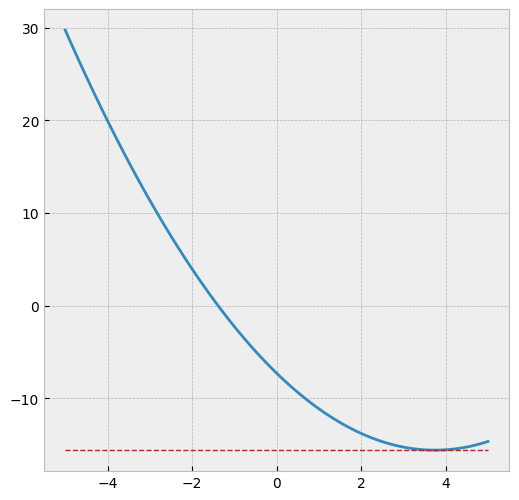

In [113]:
if f_vals:
    grid = np.linspace(-5, 5, 100)
    plt.plot(grid, np.square(grid) * a.item() + grid * b.item() + c.item())
    plt.hlines(f_vals[-1], -5, 5, "firebrick", "--", linewidth=1)

In [99]:
PROBLEM_ID = 5
GRADE = 0

if TEST:
    total_grade += GRADE

In [100]:
if TEST:
    print(f"{STUDENT}: {int(100 * total_grade / MAX_POINTS)}")

In [114]:
if not TEST:
  x_min = -b/(2*a)
  f_min = func(x_min, a, b, c)
  print(f'x_min theory: {x_min}')
  print(f'f_min theory: {f_min}')
  print(f'x_min grad: {x}')
  print(f'f_min grad: {f_vals[-1]}')

x_min theory: 3.7435126304626465
f_min theory: -15.608972549438477
x_min grad: 3.743666410446167
f_min grad: -15.608970642089844
